# Linear Regression model on house prices in London 

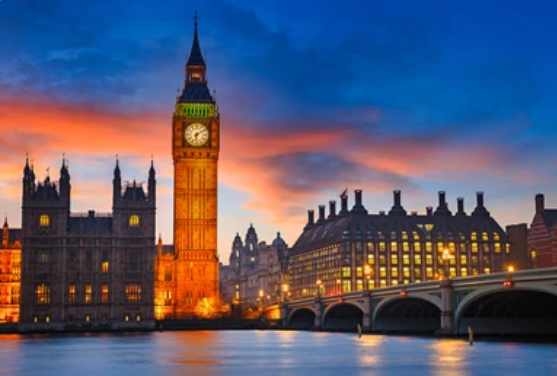

# <span style="color:red;"> What is Regression ?</span>

### Regression is a statistical technique used in machine learning and statistics to model the relationship between a <span style= "color:blue;"> dependent variable </span> (also known as the <span style= "color:blue;"> target </span> or response variable) and one or more <span style= "color:green;"> independent variables </span> (also known as <span style= "color:green;"> features </span> or predictors). The goal of regression analysis is to understand and quantify the relationship between the variables and use this understanding to make predictions or draw insights.

### The primary objective of regression is to create a mathematical model that describes how changes in the independent variables affect the dependent variable. <span style= "color:orange;"> This model is usually represented as a line or curve that best fits the data points in a way that minimizes the error between the predicted values and the actual values. </span>

### There are various types of regression techniques, with the most common being <span style= "color:brown;"> linear regression. In linear regression, the goal is to find the best-fitting straight line that minimizes the sum of squared differences between the observed data points and the values predicted by the model. This line is defined by an intercept (y-intercept) and a slope (coefficient) that describe the relationship between the variables. </span>

### Regression analysis is used for various purposes, including:

### Prediction: Once the regression model is trained on a dataset, it can be used to predict the values of the dependent variable for new or unseen data points.

### Understanding Relationships: Regression analysis helps in understanding the nature and strength of the relationship between variables. It quantifies how much a change in one variable is associated with a change in another.

### Identifying Important Features: In multiple regression, where there are multiple independent variables, the analysis can help identify which variables have a significant impact on the dependent variable.

### Model Validation and Evaluation: <span style= "color:orange;">Regression models can be evaluated using various metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess how well the model fits the data.</span>

### Forecasting Trends: Regression can be used to forecast trends in data and predict future values based on historical data.

### Overall, regression is a foundational technique in statistics and machine learning that plays a crucial role in understanding and predicting relationships between variables. It is widely used in fields such as economics, finance, biology, social sciences, and more.







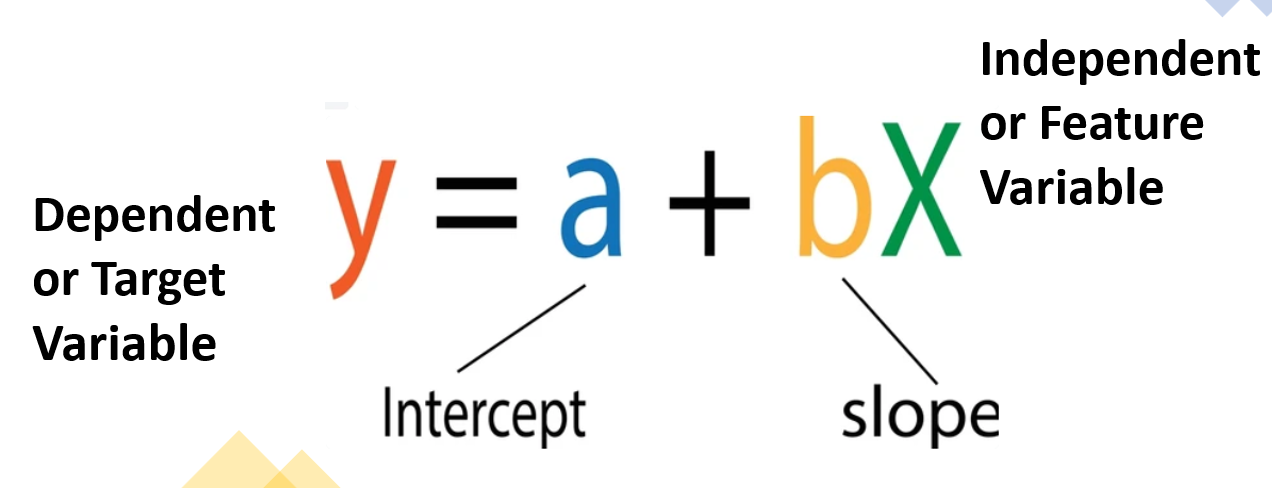

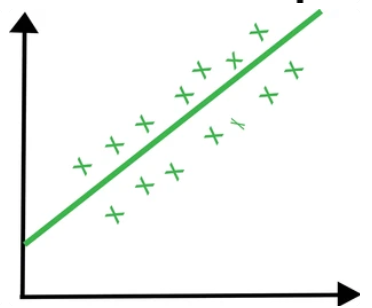

## Dataset link: https://www.kaggle.com/datasets/arnavkulkarni/housing-prices-in-london

# Linear Regression Theory 

## Linear Regression is supervized learning because labels are there 

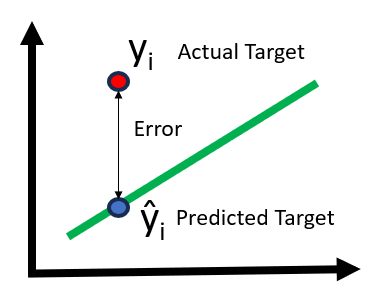

### A <span style= "color:red;"> cost function </span>, also known as a loss function or objective function, is a mathematical function that measures how well a machine learning model's predictions match the actual target values in a dataset. The purpose of a cost function is to quantify the error or the <span style= "color:blue;"> discrepancy between the predicted values and the true values. </span> In machine learning and optimization, the goal is to minimize this cost function to find the best possible model parameters.

### <span style= "color:red;"> In the context of linear regression, the most commonly used cost function is the Mean Squared Error (MSE) or the Sum of Squared Errors (SSE) cost function. The MSE cost function is defined as: </span>

### <span style= "color:red;"> MSE = (1/n) * Σ(yi - ŷi)^2 </span>

### <span style= "color:red;"> MSE = (1/n) * Σ((β0 + β1*x +  β2*x + β3*x......) - ŷi)^2 </span>

### <span style= "color:red;"> Where: </span>

### <span style= "color:red;"> n is the number of data points in the dataset. </span>
### <span style= "color:red;"> yi is the actual target value for the ith data point. </span>
### <span style= "color:red;"> ŷi is the predicted target value for the ith data point. </span>
### The goal of <span style= "color:blue;"> cost function minimization </span> is to find the model parameters (such as the coefficients in linear regression) that minimize this cost function. In linear regression, we seek to <span style= "color:blue;"> minimize the MSE by adjusting the coefficients (β0, β1, β2, ...) to obtain the best-fitting line that minimizes the squared differences between the predicted and actual values. </span>

### Gradient descent is an optimization algorithm used to minimize the cost function by iteratively updating the model parameters in the direction that reduces the cost. It's a popular technique for training machine learning models, including linear regression. The basic idea of gradient descent is to compute the gradient (a vector of partial derivatives) of the cost function with respect to the model parameters and update the parameters in the direction that reduces the cost. 

# Gradient descent method of optimization is helpful even when we have large number of features as compared to other techniques like Matrix optimization

### Here's how gradient descent works in the context of linear regression:

### Define the cost function: In linear regression, the cost function is often the MSE as mentioned earlier.

### Initialize model parameters: Start with initial values for the model parameters, often set randomly or to some default values.

### <span style= "color:blue;">Compute the gradient: Calculate the gradient of the cost function with respect to each model parameter. This involves taking partial derivatives of the cost function with respect to each parameter. </span>

### <span style= "color:blue;">∂MSE/∂β0, ∂MSE/∂β1, ∂MSE/∂β2, ... </span>

### <span style= "color:blue;">Update the parameters: Adjust the parameters in the direction of the negative gradient to minimize the cost function. The update step is done iteratively using the following formula for each parameter: </span>

###  <span style= "color:blue;">βi_new = βi_old - α * (∂MSE/∂βi_old) </span>

### <span style= "color:blue;">Where: </span>

### <span style= "color:blue;">βi_new is the new value for parameter βi. </span>
### <span style= "color:blue;">βi_old is the current value for parameter βi. </span>
### <span style= "color:green;">α (alpha) is the learning rate, a hyperparameter that controls the step size in each update. If the error is large the learning rate is big and less accurate. But if the error is small the learning rate is small but more accurate. </span>
### <span style= "color:blue;">Repeat the above steps until convergence: Continue iterating and updating the parameters until the cost function converges to a minimum or a predetermined stopping criterion is met. </span>

### Gradient descent essentially descends along the slope of the cost function, adjusting the parameters to reach the minimum (or near-minimum) point. The learning rate (α) determines the step size in each update, and it's crucial to choose an appropriate learning rate to ensure convergence without overshooting the minimum.

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Load housing price dataset from a CSV file
data = pd.read_csv("London.csv")
data.head()


,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [37]:
print(data['Price'].mean())

1864172.5399425288


# R - Squared Value

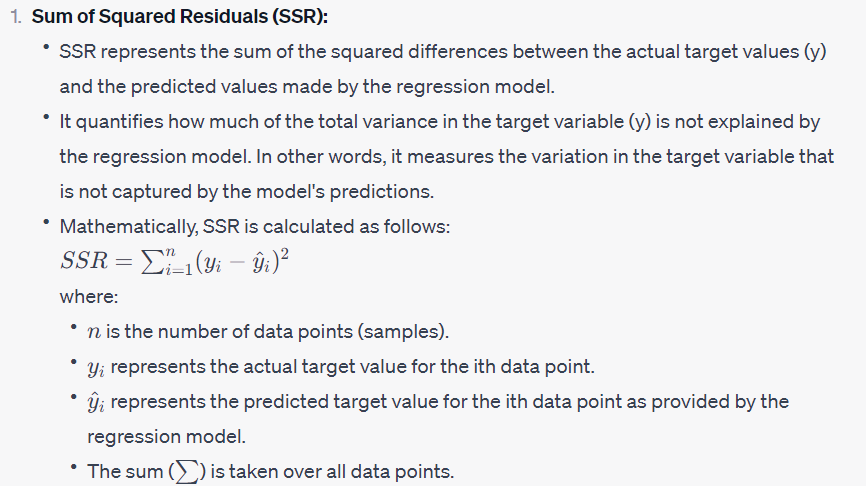

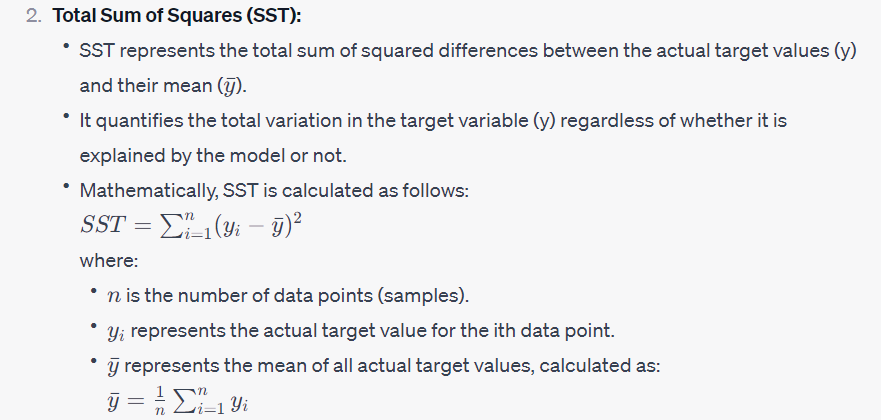

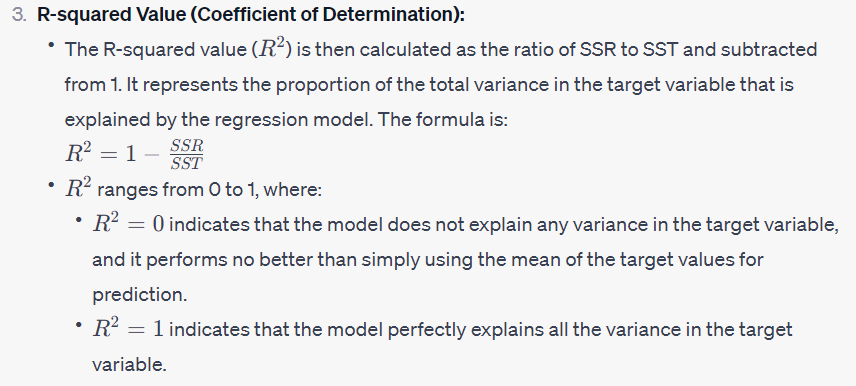

#### This code performs linear regression analysis on a dataset containing housing prices in London. It begins by importing necessary libraries such as NumPy for numerical operations, Pandas for data manipulation, Matplotlib for visualization, and scikit-learn's LinearRegression model for regression analysis. The dataset is loaded from a CSV file, and the code extracts the 'Area in sq ft' as features and 'Price' as the target variable. The data is reshaped into arrays suitable for machine learning. A Linear Regression model is created, trained on the data, and used to make predictions for a new size value. The code calculates Mean Squared Error (MSE) and R-squared values for model evaluation, retrieves the model coefficients (slope and intercept), and visualizes the data along with the regression line. Finally, it prints various results, including RMSE, R-squared, the regression line's slope and intercept, and the predicted price for a specific size (4000 sqft) as output.

target: 0       1675000
1        650000
2        735000
3       1765000
4        675000
         ...   
3475    3350000
3476    5275000
3477    5995000
3478    6300000
3479    8650000
Name: Price, Length: 3480, dtype: int64

np.array(target): [1675000  650000  735000 ... 5995000 6300000 8650000]

np.array(target).reshape(-1, 1): [[1675000]
 [ 650000]
 [ 735000]
 ...
 [5995000]
 [6300000]
 [8650000]]



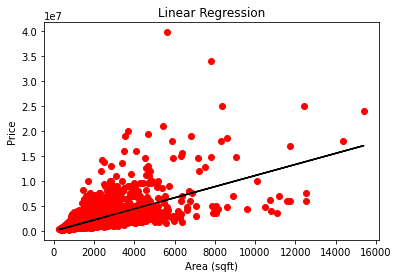

Root Mean Squared Error (RMSE): 1687572.445761526
R-squared value: 0.4458361150559953
Coefficient (Slope, b1): 1109.6765466282711
Intercept (Y-intercept, b0): -36674.04815517971
Predicted price for size 4000 sqft: [[4402032.13835791]]


In [39]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for visualization
from sklearn.linear_model import LinearRegression  # Import LinearRegression model
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function
import math  # Import math module for mathematical operations

# Load housing price dataset from a CSV file
data = pd.read_csv("London.csv")  # Load dataset into a Pandas DataFrame

# Extract features (size) and target (price)
features = data['Area in sq ft']  # Extract size (features) column
target = data['Price']  # Extract price (target) column

# Reshape data into arrays suitable for machine learning
x = np.array(features).reshape(-1, 1)  # Convert features to a 2D array
y = np.array(target).reshape(-1, 1)  # Convert target to a 2D array

###############
# Example
# features = [1200, 1400, 1600, 1800, 2000]
# x = np.array(features).reshape(-1, 1)
# After running this code, the variable x will contain the following two-dimensional (2D) array:

# array([[1200],
#       [1400],
#       [1600],
#       [1800],
#       [2000]])

################

# In the given code, -1 is used for the second dimension, which corresponds to the number of columns. 
# By specifying -1 for the second dimension and 1 for the first dimension (number of rows), you're essentially 
# instructing NumPy to reshape the array into a format where there's only one column (a single feature) 
# and the number of rows is calculated automatically based on the total number of data points.

# In other words, this operation effectively takes a one-dimensional array (representing the 'features' data) 
# and reshapes it into a two-dimensional array with one column (feature) and a number of rows that matches the 
# total number of data points in the original array.

print(f"target: {target}\n")
print(f"np.array(target): {np.array(target)}\n")
print(f"np.array(target).reshape(-1, 1): {y}\n")

# Create and train a Linear Regression model
regressor = LinearRegression()  # Instantiate a LinearRegression object
# This model is designed to minimize the residual sum of squares (RSS), 
# which is a measure of the difference between the actual target values 
# and the values predicted by the linear regression model.

# Train the model on the data
regressor.fit(x, y)  # Fit the model using features (x) and target (y)
# The LinearRegression() constructor sets up the model's parameters and 
# initializes them with default values. When you subsequently call the 
# fit() method of the linear regression model and provide it with the training data, 
# the model adjusts its parameters (coefficients) to 
# minimize the RSS and create the best-fitting linear relationship 
# between the features and the target variable.

# Calculate Mean Squared Error (MSE) for evaluation
# MSE measures the average squared difference between actual and predicted values
mse = mean_squared_error(y, regressor.predict(x))  # Calculate MSE
rmse = math.sqrt(mse)  # Calculate RMSE (square root of MSE)
# The Mean Squared Error, which gives you an idea of how well the model's predicted values 
# match the actual target values. A lower MSE indicates that the model's predictions are closer 
# to the actual values, while a higher MSE suggests greater discrepancies between predictions and actual values.

# Calculate R-squared value
r_squared = regressor.score(x, y)  # Calculate R-squared value
# When you call regressor.score(x, y), the score method internally calculates the R-squared value. 
# The R-squared value ranges from 0 to 1:
# A higher R-squared value suggests that the model's predictions closely follow the actual data points.
# The R-squared value (r_squared = regressor.score(x, y)) is calculated based on 
# the relationship between the actual target values (y) and the predictions made by the regression model 
# using the input features (x). 
# The formula for R-squared involves comparing the variance explained by 
# the model's predictions to the total variance in the actual target values.

# Retrieve model coefficients and intercept
slope = regressor.coef_[0][0]  # Get the slope (coefficient) of the regression line

# The [0] in [0][0] refers to the first dimension of the coefficient matrix, 
# which typically corresponds to the features or regressors.

# The [0] following the first [0] is indexing a specific coefficient within the first dimension. 
# This means you are extracting the coefficient associated with the first feature or regressor.

# regressor.coef_: This attribute of the LinearRegression model represents the coefficients (slopes) 
# of the regression line. Since it's a 2D array, 
# accessing [0][0] extracts the actual coefficient value from the array.

# slope: The variable slope is assigned the extracted coefficient value. 
# It represents the rate of change of the predicted target variable (price) 
# for each one-unit change in the feature (size).

# The significance of retrieving the model coefficient (slope) is that it 
# quantifies the relationship between the feature (size) and the target variable (price). 
# A positive coefficient implies that an increase in the feature value (size) corresponds to an 
# increase in the target value (price). Conversely, 
# a negative coefficient suggests that an increase in the feature value leads to a 
# decrease in the target value. 
# The magnitude of the coefficient indicates the strength of this relationship.

# For instance, if slope is 150, it implies that for every one-unit increase in the 
# size of the house (sqft_living), the predicted price is expected to increase by $150 
# (or the currency unit used in the data).

intercept = regressor.intercept_[0]  # Get the intercept of the regression line

# The [0] at the end of regressor.intercept_[0] is used to extract the first element of the intercept. 
# In linear regression, there's only one intercept value, so you are simply extracting that single value.

# regressor.intercept_: This attribute of the LinearRegression model represents the 
# intercept value of the regression line. It's a one-dimensional array containing the intercept value.

# intercept: The variable intercept is assigned the intercept value from the array. 
# It represents the y-coordinate where the regression line crosses the y-axis when the x-coordinate (size) is zero.

# The significance of retrieving the intercept is that it provides essential context for the regression line's behavior.
# The intercept represents the predicted target value (price) when the size of the house (feature) is zero. 
# While this might not be practically meaningful in all cases (as a house can't have zero size), 
# it's still valuable because it contributes to the overall equation of the regression line.

# For example, if intercept is $50,000, it suggests that even if a house has zero size (which is unrealistic), 
# the predicted price would start at $50,000. As the size of the house increases, 
# the price prediction would change based on the coefficient (slope) of the regression line.

# Make predictions
new_size = np.array([[4000]])  # Create a 2D array for a new size value
predicted_price = regressor.predict(new_size)  # Use the model to predict the price

# Visualize the data and regression line
plt.scatter(x, y, color='red')  # Create a scatter plot of the data points
plt.plot(x, regressor.predict(x), color='black')  # Plot the regression line
plt.title("Linear Regression")  # Set the title of the plot
plt.xlabel("Area (sqft)")  # Label the x-axis
plt.ylabel("Price")  # Label the y-axis
plt.show()  # Display the plot

# Display results
print("Root Mean Squared Error (RMSE):", rmse)  # Print RMSE for model evaluation
# A lower MSE indicates that the model's predictions are closer 
# to the actual values, while a higher MSE suggests greater discrepancies between predictions and actual values.
print("R-squared value:", r_squared)  # Print R-squared for model evaluation
# The R-squared value ranges from 0 to 1:
# A higher R-squared value suggests that the model's predictions closely follow the actual data points.
print("Coefficient (Slope, b1):", slope)  # Print the slope of the regression line
# It represents the rate of change of the predicted target variable (price) 
# for each one-unit change in the feature (size).
print("Intercept (Y-intercept, b0):", intercept)  # Print the y-intercept of the regression line
# The intercept represents the predicted target value (price) when the size of the house (feature) is zero. 
print("Predicted price for size 4000 sqft:", predicted_price)  # Print predicted price